In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citypy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates[15]

(26.03038724775513, -73.39739067560501)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

628

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    # If an error is esperienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    
    # Add 1 to the record count.
    record_count += 1
    
# Indicate that Data Loading is complete.
print("--------------------------------")
print("Data Retrieval Complete         ")
print("--------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | sinop
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | kuche
City not found. Skipping...
Processing Record 7 of Set 1 | sarankhola
Processing Record 8 of Set 1 | sawakin
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | lasa
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | savannah bight
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | masuguru
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | nargana
Processing Record 21 of Se

Processing Record 38 of Set 4 | fuquay-varina
Processing Record 39 of Set 4 | lethem
Processing Record 40 of Set 4 | malindi
Processing Record 41 of Set 4 | mbanza-ngungu
Processing Record 42 of Set 4 | bara
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | kaka
Processing Record 45 of Set 4 | sechura
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | impfondo
Processing Record 48 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 49 of Set 4 | mitu
Processing Record 50 of Set 4 | kudahuvadhoo
Processing Record 1 of Set 5 | sohag
Processing Record 2 of Set 5 | acari
Processing Record 3 of Set 5 | itigi
Processing Record 4 of Set 5 | at-bashi
Processing Record 5 of Set 5 | tazovskiy
Processing Record 6 of Set 5 | ginda
Processing Record 7 of Set 5 | aasiaat
Processing Record 8 of Set 5 | hilton head island
Processing Record 9 of Set 5 | cascais
Processing Record 10 of Set 5 | resen
Processing Record 11 of Set 5 | takoradi
Proce

Processing Record 31 of Set 8 | melilla
Processing Record 32 of Set 8 | nanortalik
Processing Record 33 of Set 8 | treinta y tres
Processing Record 34 of Set 8 | coruripe
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | balod
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | kostomuksha
Processing Record 39 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 40 of Set 8 | galle
Processing Record 41 of Set 8 | talcahuano
Processing Record 42 of Set 8 | praia da vitoria
Processing Record 43 of Set 8 | petrokamenskoye
Processing Record 44 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 45 of Set 8 | mandal
Processing Record 46 of Set 8 | sahrak
City not found. Skipping...
Processing Record 47 of Set 8 | okahandja
Processing Record 48 of Set 8 | biasca
Processing Record 49 of Set 8 | kulhudhuffushi
Processing Record 50 of Set 8 | nizhneshilovka
City not found. Skipping...
Processing Record 1 of Set 9 | quijing

Processing Record 17 of Set 12 | tawkar
City not found. Skipping...
Processing Record 18 of Set 12 | road town
Processing Record 19 of Set 12 | belyy yar
Processing Record 20 of Set 12 | abu samrah
Processing Record 21 of Set 12 | kinsale
Processing Record 22 of Set 12 | kamyshevatskaya
Processing Record 23 of Set 12 | urumqi
Processing Record 24 of Set 12 | skjervoy
Processing Record 25 of Set 12 | naberera
Processing Record 26 of Set 12 | babanusah
City not found. Skipping...
Processing Record 27 of Set 12 | gornopravdinsk
Processing Record 28 of Set 12 | berlevag
Processing Record 29 of Set 12 | trabzon
Processing Record 30 of Set 12 | nieuw nickerie
Processing Record 31 of Set 12 | mazagao
Processing Record 32 of Set 12 | berbera
Processing Record 33 of Set 12 | rensvik
Processing Record 34 of Set 12 | kensington
Processing Record 35 of Set 12 | bud
Processing Record 36 of Set 12 | khorramshahr
Processing Record 37 of Set 12 | luanda
Processing Record 38 of Set 12 | la tuque
Proces

In [11]:
len(city_data)

584

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.47,-68.59,-29.20,73,1,3.36,CA,2020-02-23 05:21:44
1,Sinop,41.77,34.87,41.00,93,90,4.70,TR,2020-02-23 05:21:44
2,Georgetown,5.41,100.34,89.60,52,20,14.99,MY,2020-02-23 05:21:44
3,Bredasdorp,-34.53,20.04,63.00,77,10,5.82,ZA,2020-02-23 05:21:44
4,Necochea,-38.55,-58.74,52.00,96,0,4.00,AR,2020-02-23 05:21:45
5,Sarankhola,22.31,89.79,90.86,24,0,2.01,BD,2020-02-23 05:21:45
6,Sawakin,19.11,37.33,69.80,64,81,5.82,SD,2020-02-23 05:21:45
7,Hithadhoo,-0.60,73.08,82.44,79,100,13.71,MV,2020-02-23 05:16:51
8,Lasa,46.62,10.70,37.40,69,5,5.82,IT,2020-02-23 05:18:52
9,Hermanus,-34.42,19.23,66.00,82,0,7.00,ZA,2020-02-23 05:21:46


In [13]:
# Reordering the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2020-02-23 05:21:44,70.47,-68.59,-29.20,73,1,3.36
1,Sinop,TR,2020-02-23 05:21:44,41.77,34.87,41.00,93,90,4.70
2,Georgetown,MY,2020-02-23 05:21:44,5.41,100.34,89.60,52,20,14.99
3,Bredasdorp,ZA,2020-02-23 05:21:44,-34.53,20.04,63.00,77,10,5.82
4,Necochea,AR,2020-02-23 05:21:45,-38.55,-58.74,52.00,96,0,4.00
5,Sarankhola,BD,2020-02-23 05:21:45,22.31,89.79,90.86,24,0,2.01
6,Sawakin,SD,2020-02-23 05:21:45,19.11,37.33,69.80,64,81,5.82
7,Hithadhoo,MV,2020-02-23 05:16:51,-0.60,73.08,82.44,79,100,13.71
8,Lasa,IT,2020-02-23 05:18:52,46.62,10.70,37.40,69,5,5.82
9,Hermanus,ZA,2020-02-23 05:21:46,-34.42,19.23,66.00,82,0,7.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/22/20'

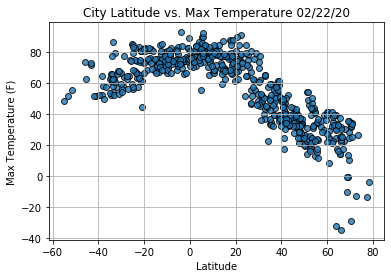

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

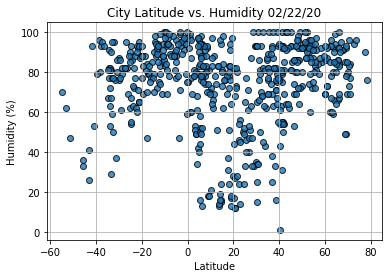

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

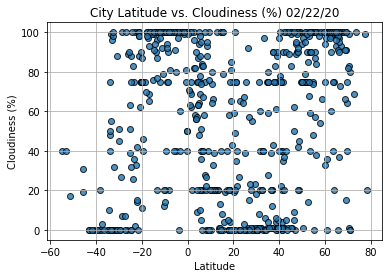

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

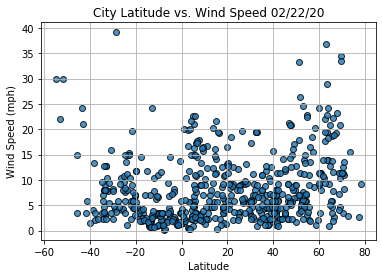

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, 
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The correlation coefficient is: {r_value: .5f}, p-value is: {p_value: .10f}")

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

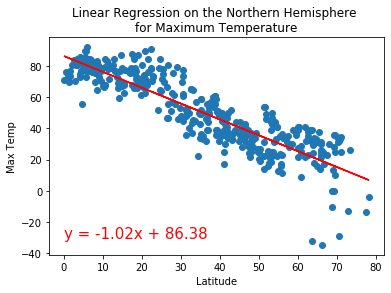

The correlation coefficient is: -0.88706, p-value is:  0.0000000000


In [23]:
# Linear regression for temperature on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp', (0, -30))

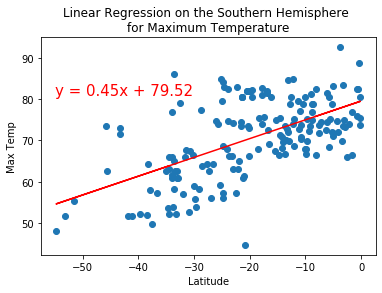

The correlation coefficient is:  0.58311, p-value is:  0.0000000000


In [24]:
# Linear regression for temperature on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp', (-55, 81))

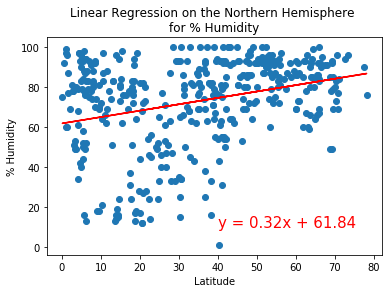

The correlation coefficient is:  0.29773, p-value is:  0.0000000009


In [25]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity', (40,10))

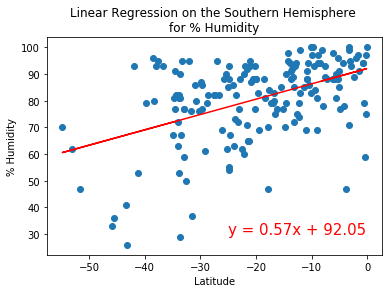

The correlation coefficient is:  0.46718, p-value is:  0.0000000001


In [26]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity', (-25,30))

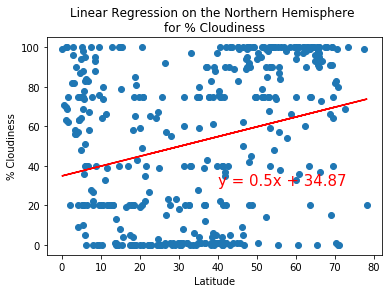

The correlation coefficient is:  0.27006, p-value is:  0.0000000312


In [27]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness', (40,30))

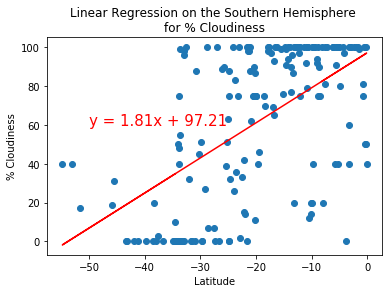

The correlation coefficient is:  0.56842, p-value is:  0.0000000000


In [28]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness', (-50,60))

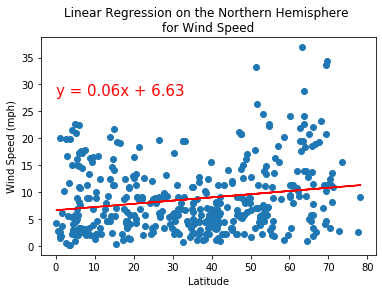

The correlation coefficient is:  0.19213, p-value is:  0.0000960043


In [29]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)', (0,28))

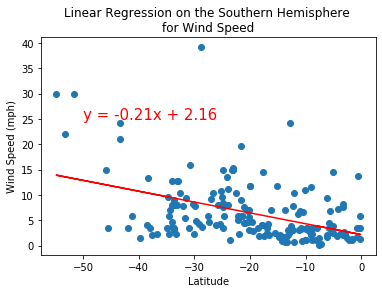

The correlation coefficient is: -0.44252, p-value is:  0.0000000007


In [30]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)', (-50,25))